In [ ]:
import numpy as np
import pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
from google.colab import drive;
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
merge = pd.read_excel('/content/merge.xlsx')
merge

,ds,id_object,yhat_profet,yhat_catboost,yhat_arima,y_profet,profet_diff,catboost_diff,arima_diff,profet_diff_abs,catboost_diff_abs,arima_diff_abs,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2024-07-29,1,18.345953,16.088069,20.600442,28,-9.654047,-11.911931,-7.399558,9.654047,11.911931,7.399558,NaN,NaN,NaN,profet,catboost,arima
1,2024-07-30,1,23.248096,17.217700,18.516864,20,3.248096,-2.782300,-1.483136,3.248096,2.782300,1.483136,NaN,NaN,mse,20.706033,24.413245,31.896612
2,2024-07-31,1,17.884947,15.111361,20.334490,46,-28.115053,-30.888639,-25.665510,28.115053,30.888639,25.665510,NaN,NaN,rmse,4.550388,4.940976,5.647709
3,2024-08-01,1,28.731784,14.979885,8.621120,21,7.731784,-6.020115,-12.378880,7.731784,6.020115,12.378880,NaN,NaN,mape,0.382149,0.293296,0.642511
4,2024-08-02,1,20.033345,15.677269,19.136561,22,-1.966655,-6.322731,-2.863439,1.966655,6.322731,2.863439,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2024-10-26,6,9.639438,9.336543,7.046459,5,4.639438,4.336543,2.046459,4.639438,4.336543,2.046459,NaN,NaN,NaN,NaN,NaN,NaN
554,2024-10-27,6,10.514991,10.587020,8.305195,6,4.514991,4.587020,2.305195,4.514991,4.587020,2.305195,NaN,NaN,NaN,NaN,NaN,NaN
555,2024-10-28,6,12.278812,11.189276,10.920364,6,6.278812,5.189276,4.920364,6.278812,5.189276,4.920364,NaN,NaN,NaN,NaN,NaN,NaN
556,2024-10-29,6,11.065487,11.039358,9.685835,7,4.065487,4.039358,2.685835,4.065487,4.039358,2.685835,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bookings_03_11.csv', low_memory=False).drop(columns='Unnamed: 0')
df['date_book'] = pd.to_datetime(df['date_book']); df

,id_object,date_book,room_type_agg,rooms,amount,prepay,guests,nights,price_per_night,target,...,Td_mean,Td_min,Td_max,Td_sd,click_search,click_ad,direct_visit,click_socnet,click_link,total_traffic
0,1,2019-01-01,Апартаменты,1.0,26600.000000,0.000000,1.000000,2.000000,13300.000000,1,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
1,1,2019-01-01,Коттедж,1.0,59400.000000,59400.000000,1.000000,1.000000,59400.000000,1,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
2,1,2019-01-01,Стандарт,1.5,13000.000000,7300.000000,2.000000,1.000000,10150.000000,2,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
3,1,2019-01-02,Коттедж,1.0,47900.000000,47900.000000,1.000000,2.000000,23950.000000,1,...,-1.3625,-4.5,-0.1,1.678381,6407,0,1412,146,466,9018
4,1,2019-01-02,Стандарт,1.0,14683.181818,13201.363636,1.818182,1.454545,9277.575455,11,...,-1.3625,-4.5,-0.1,1.678381,6407,0,1412,146,466,9018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19710,6,2024-10-28,Студия,1.0,21375.000000,21375.000000,1.000000,1.500000,14012.500000,2,...,-3.6500,-6.3,-1.8,1.683534,1100,532,439,21,163,2455
19711,6,2024-10-29,Стандарт,1.0,8975.000000,4575.250000,1.500000,1.000000,8975.000000,4,...,-4.2500,-5.5,-3.2,0.814160,1040,805,390,26,160,2577
19712,6,2024-10-29,Студия,1.0,22525.000000,17358.333333,1.666667,2.000000,11775.000000,3,...,-4.2500,-5.5,-3.2,0.814160,1040,805,390,26,160,2577
19713,6,2024-10-30,Стандарт,1.0,25445.000000,9393.727273,1.363636,1.636364,13948.181818,11,...,-3.4125,-5.1,-1.8,1.085538,925,853,366,34,158,2466


In [ ]:
df = df[['id_object', 'date_book', 'room_type_agg', 'target', 'working_day',
       'week_trend', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd']]

agg_df = df.groupby(['id_object', 'date_book']).agg({'target': 'sum'}).reset_index().merge(df[['id_object', 'date_book', 'working_day',
       'week_trend', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd']].drop_duplicates(), on=['id_object', 'date_book'], how = 'left')

agg_df.rename(columns={'date_book': 'ds', 'target': 'y'}, inplace=True)
train_df = agg_df[agg_df['ds'] < '2024-07-29']

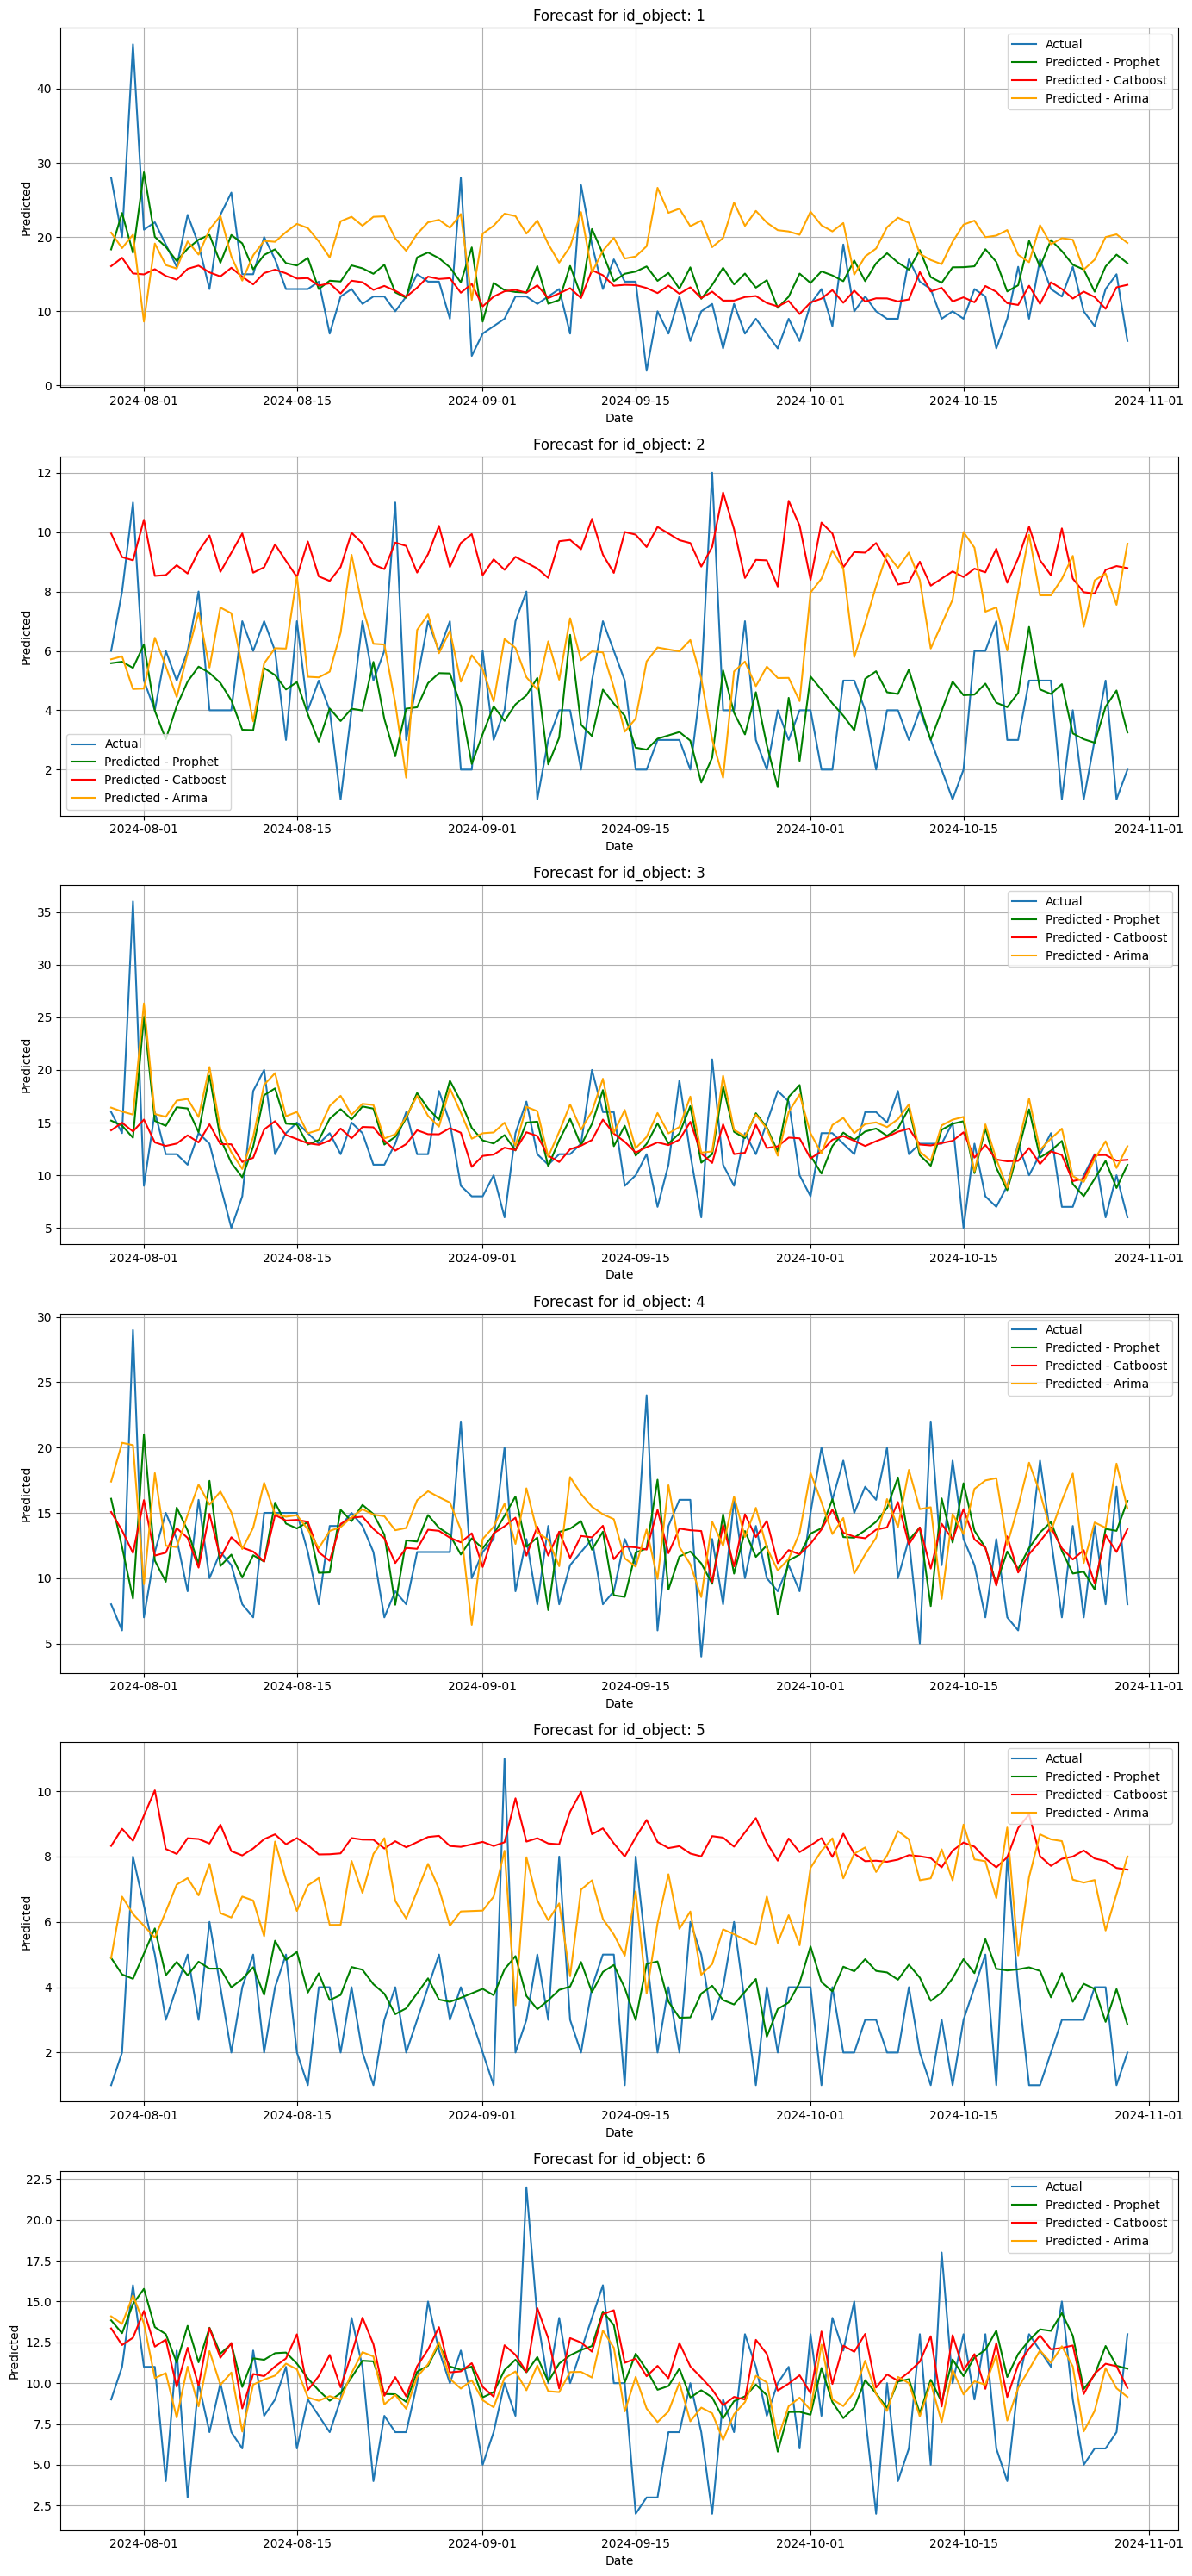

In [ ]:
unique_id_objects = merge['id_object'].unique()
num_id_objects = len(unique_id_objects)

fig, axes = plt.subplots(num_id_objects, 1, figsize=(14, 5 * num_id_objects))

for ax, id_object in zip(axes, unique_id_objects):
    group_test = merge[merge['id_object'] == id_object]
    group_train = train_df[train_df['id_object'] == id_object]
    ax.plot(group_test['ds'], group_test['y_profet'], label='Actual')
    # ax.plot(group_train['ds'], group_train['y'], label='Истинные значения - трейн')
    ax.plot(group_test['ds'], group_test['yhat_profet'], label='Predicted - Prophet', color = 'green')
    ax.plot(group_test['ds'], group_test['yhat_catboost'], label='Predicted - Catboost', color = 'red')
    ax.plot(group_test['ds'], group_test['yhat_arima'], label='Predicted - Arima', color = 'orange')


    # group_forecast = final_forecast[final_forecast['id_object'] == id_object]
    # ax.plot(group_forecast['ds'], group_forecast['yhat'], label='Предсказанные значения', linestyle='--')

    ax.set_title(f'Forecast for id_object: {id_object}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Predicted')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()